# Digit Classification with KNN

### With this project I'm working to create a basic image recognition system for classifying digits using variations of the K-Nearest Neighbors algorithm.

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [14]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data and partition into training, development, and test sets. 

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', as_frame = False, return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0



In [4]:
print(X.shape)
shuffle = np.random.permutation(np.arange(X.shape[0]))
print(len(shuffle))
print(type(X))
print(Y)
#print(X[shuffle[0]])

(70000, 784)
70000
<class 'numpy.ndarray'>
['5' '0' '4' ... '4' '5' '6']


In [5]:
# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [6]:
# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

### Step 1: Visualize a select sample of images
---
Creating a 10x10 grid that visualizes 10 examples of each digit in the dataset. 

In [ ]:
print(train_data[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


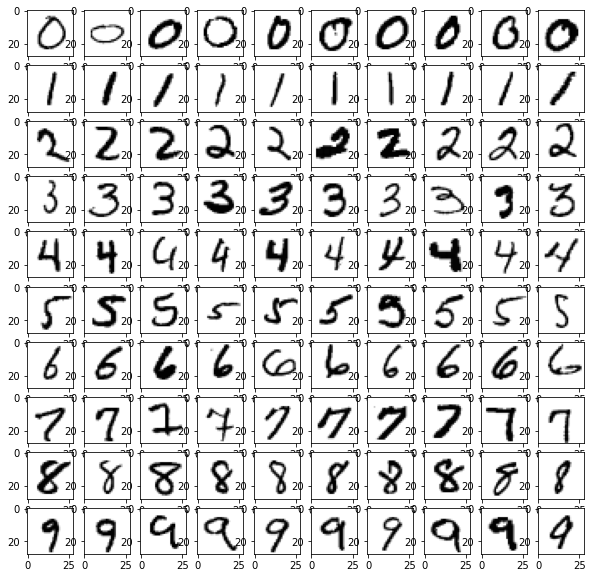

In [34]:

def S1(num_examples=10):
  fig = plt.figure(figsize=(10,num_examples))
  images = list() 

  for i in range(10):
    #extend your image list by adding a list of ten images that are 
    #reshaped in a 28x28 grid
    images.extend([np.array(test_data[k], np.double).reshape(28,28) \
                  #generate an enumerator that allows you to pull all images that
                  #match the currnet number in the outside for loop
                  for k in [j for j, item in enumerate(test_labels) if str(i) in item][:num_examples]])
  
    #once the image list is built, add images sequentially, resetting each row for a 
    #new number
    for m in range(len(images)):
      plt.subplot(10, num_examples, m+1)
      plt.imshow(images[m], cmap = plt.cm.binary)

  plt.show()

S1(10)

### Step 2: Evaluate different choices for k
---

Produce and evaluate k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9. Display performance statistics for each value of K. 

In [12]:
def S2(k_values):

  #create a for loop that works through each classifier then assess performance
  for i in k_values: #iterate across 1,3,5,7,9
    print("K = "+ str(i))
    #build classifier
    
    knn = KNeighborsClassifier(n_neighbors=i)
    #train classifier
    knn.fit(mini_train_data, mini_train_labels)
    #pred dev data
    pred = knn.predict(dev_data)
    #print results to the results container
    print(classification_report(dev_labels,pred, output_dict= True))

k_values = [1, 3, 5, 7, 9]
S2(k_values)

K = 1
{'0': {'precision': 0.9158878504672897, 'recall': 0.9423076923076923, 'f1-score': 0.928909952606635, 'support': 104}, '1': {'precision': 0.8538461538461538, 'recall': 0.9736842105263158, 'f1-score': 0.9098360655737705, 'support': 114}, '2': {'precision': 0.9310344827586207, 'recall': 0.8350515463917526, 'f1-score': 0.8804347826086957, 'support': 97}, '3': {'precision': 0.8775510204081632, 'recall': 0.8113207547169812, 'f1-score': 0.8431372549019608, 'support': 106}, '4': {'precision': 0.8877551020408163, 'recall': 0.87, 'f1-score': 0.8787878787878789, 'support': 100}, '5': {'precision': 0.8217821782178217, 'recall': 0.9021739130434783, 'f1-score': 0.8601036269430051, 'support': 92}, '6': {'precision': 0.9494949494949495, 'recall': 0.9494949494949495, 'f1-score': 0.9494949494949495, 'support': 99}, '7': {'precision': 0.84, 'recall': 0.865979381443299, 'f1-score': 0.8527918781725888, 'support': 97}, '8': {'precision': 0.9024390243902439, 'recall': 0.7956989247311828, 'f1-score': 0.

### Step 3: Examining the effects of larger training sizes
---
Evaluate how sample size might strain resources. Train different models and then plot time required for training and evaluating each model. 


Training size: 100 - Train time: 0.05593585968017578 - Accuracy: 0.67 - Eval Time: 0.04601716995239258
Training size: 200 - Train time: 0.06105446815490723 - Accuracy: 0.789 - Eval Time: 0.04865622520446777
Training size: 400 - Train time: 0.08641505241394043 - Accuracy: 0.832 - Eval Time: 0.04782223701477051
Training size: 800 - Train time: 0.10753440856933594 - Accuracy: 0.864 - Eval Time: 0.04564976692199707
Training size: 1600 - Train time: 0.15363693237304688 - Accuracy: 0.902 - Eval Time: 0.0493013858795166
Training size: 3200 - Train time: 0.26390767097473145 - Accuracy: 0.914 - Eval Time: 0.04011225700378418
Training size: 6400 - Train time: 0.46739649772644043 - Accuracy: 0.939 - Eval Time: 0.03065204620361328
Training size: 12800 - Train time: 0.8296148777008057 - Accuracy: 0.955 - Eval Time: 0.024945497512817383
Training size: 25600 - Train time: 1.569319486618042 - Accuracy: 0.963 - Eval Time: 0.02475714683532715
Training size: 40000 - Train time: 2.6808743476867676 - Accur

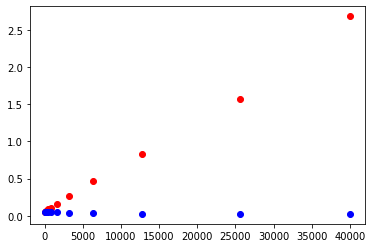

In [20]:
def S3(train_sizes, accuracies, train_times, eval_times):
    #build classifier for all loops
  knn = KNeighborsClassifier(n_neighbors = 1)

  #generate for loop that trains models based on different training set sizes
  for i in train_sizes:
    #start the clock
    t1 = time.time()
    #fit model with different training sizes
    knn.fit(train_data[:i], train_labels[:i])
    #predict based on the above using the dev set
    
    pred = knn.predict(dev_data)
    #stop the clock 
    t2 = time.time() - t1

    
    #score the pred
    t3 = time.time()
    score = classification_report(dev_labels, pred, output_dict = True)['accuracy']
    t4 = time.time() - t3
    accuracies.append(score)
    train_times.append(t2)
    eval_times.append(t4)
    #print res and time
    print("Training size: "+str(i)+" - Train time: " + str(t2) 
          + " - Accuracy: " + str(score) + " - Eval Time: " + str(t4))
    
    #plot training sizes v. reg predict for training sizes 
  plt.scatter(train_sizes, train_times, color = 'red')
  plt.scatter(train_sizes, eval_times, color = 'blue')
  #plt.plot(X, arr_yhat, color = 'blue', linewidth = 3)
  plt.show()

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 40000]
accuracies = []
train_times = []
eval_times = []
S3(train_sizes, accuracies, train_times, eval_times)

Training and model times increased with set sizes as the training step consists of loading data into memory and prediction requires assessing distances for every element in the training set. Evaluation times stayed relative constant per expectations.

### Step 4: Evaluating model performace with more training data. 
---
Using data from previous step, I aim to predict what accuracy I would get if I had additional training data.

Training Sizes: 
[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
Accuracies
[0.67, 0.789, 0.832, 0.864, 0.902, 0.914, 0.939, 0.955, 0.963]


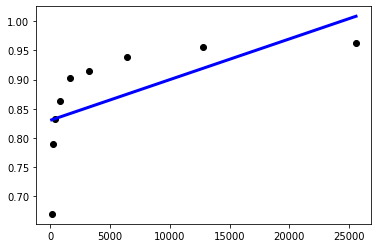

R-squared, Round 1:
0.3937574746297683
Predicted Accuracies, Round 1: 
[1.24741126 1.66451513 7.78203857]


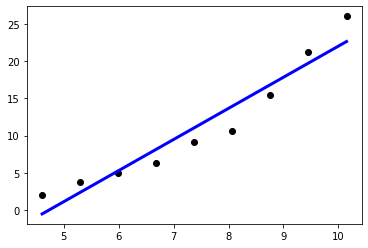

R-sqaured, Round 2:
0.9227614178944142
Accuracies, Round 2: 
[0.99999600674876, 0.99999800344906, 0.9999997604217729]


In [9]:
def S4():

  import math

  #build dict of accuracies
  train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
  X = np.array(train_sizes).reshape(-1, 1)
  #create results container
  res = list()

  #generate for loop that trains models based on different training set sizes
  for i in train_sizes:
    
    knn = KNeighborsClassifier(n_neighbors=1)

    #fit model with different training sizes
    knn.fit(train_data[:i], train_labels[:i])
    #predict based on the above using the dev set
    pred = knn.predict(dev_data)
    #score the pred and add to resutls list
    res.append(classification_report(dev_labels, 
                                    pred, output_dict = True)['accuracy'])
    
  print("Training Sizes: ")
  print(train_sizes)
  #turn lists into arrays
  print("Accuracies")
  print(res)

  #convert accuracis into an ndarray
  y = np.array(res)

  #array for the regression extension
  arr_pred_fut = np.array([60000, 120000, 1000000]).reshape(-1,1)

  #fit the regression
  reg = LinearRegression().fit(X, y)
  #get predictions for the subseqeunt plot
  arr_yhat = reg.predict(X)

  #plot training sizes v. reg predict for training sizes 
  plt.scatter(train_sizes, res, color = 'black')
  plt.plot(X, arr_yhat, color = 'blue', linewidth = 3)
  plt.show()

  #score will give you R-squared
  print("R-squared, Round 1:")
  print(reg.score(X,y))

  print("Predicted Accuracies, Round 1: ")
  print(reg.predict(arr_pred_fut))

  #now transform training data and odds y
  import math

  #calculate odds and logs of training sizes
  odds = np.array([i/(1-i) for i in res])
  logs = np.array([math.log(i) for i in train_sizes]).reshape(-1,1)

  #fit the regression
  reg = LinearRegression().fit(logs, odds)
  #get predictions for the subseqeunt plot
  arr_yhat = reg.predict(logs)

  #plot training sizes v. reg predict for training sizes 
  plt.scatter(logs, odds, color = 'black')
  plt.plot(logs, arr_yhat, color = 'blue', linewidth = 3)
  plt.show()

  #now calculate new r-squared and accuracies
  print("R-sqaured, Round 2:")
  print(reg.score(logs, odds))

  print("Accuracies, Round 2: ")
  print([i/(i+1) for i in reg.predict(arr_pred_fut)])

S4()

### Step 5: The confusion matrix.

Model Accuracy: 
0.877


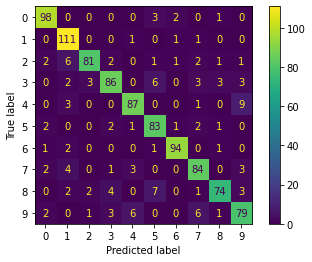

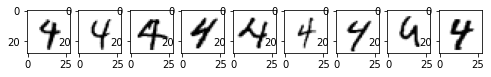

In [15]:
def S5():
  #loop through indices to find those that are mislabeled and then print all 11 misclassification

  #create and classifier
  nn = KNeighborsClassifier(n_neighbors=1)
  nn.fit(mini_train_data, mini_train_labels)
  #assess the model
  pred = nn.predict(dev_data)
  print("Model Accuracy: ")
  print(nn.score(dev_data, dev_labels))
  #produce the confusion matrix with pred to determine which pair had the highest confusion rate
  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(dev_labels, pred, 
                                                                    labels = nn.classes_),
                                display_labels = nn.classes_)
  disp.plot()

  images = list()

  #so for every label in dev set, compare to the predictions label
  for i in range(len(dev_labels)):
    #if the dev label = 4, and predicted label = 9
    if dev_labels[i] == str(4) and pred[i] == str(9):
      #pull the indicie and add image data, reshaped to image list
      images.append(np.array(dev_data[i],np.double).reshape(28,28))

  #create overall plot 
  fig = plt.figure(figsize=(10,10))

  #generate image for all mislabeled numbers
  for m in range(len(images)):
      plt.subplot(1, 11, m+1)
      plt.imshow(images[m], cmap=plt.cm.binary) 

  plt.show()

S5()
